In [4]:

import pandas as pd


from pandas._libs.tslibs.offsets import BusinessMixin

import matplotlib.pyplot as plt

In [5]:

# Let's read this csv data file into a dataframe:

df = pd.read_csv("business-licences.csv", sep=";", low_memory = False)

# Let's look at some general info about the dataframe:

print(df.shape)

(131740, 25)


In [6]:
# Let's look at the columns:

print(df.columns)

Index(['FOLDERYEAR', 'LicenceRSN', 'LicenceNumber', 'LicenceRevisionNumber',
       'BusinessName', 'BusinessTradeName', 'Status', 'IssuedDate',
       'ExpiredDate', 'BusinessType', 'BusinessSubType', 'Unit', 'UnitType',
       'House', 'Street', 'City', 'Province', 'Country', 'PostalCode',
       'LocalArea', 'NumberofEmployees', 'FeePaid', 'ExtractDate', 'Geom',
       'geo_point_2d'],
      dtype='object')


In [32]:
# We can start thinking about which ones we want to use later. 

# For now, let's make sure that we view all columns when we print the dataframe:

pd.set_option('display.max_columns', None)

# We can look at some example data:

print(df.head())

print(df.sample(10))

   FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
0          24     4491140     24-108817                     10   
1          24     4491148     24-108826                     10   
2          24     4491150     24-108829                     10   
3          24     4491164     24-108844                     10   
4          24     4491166     24-108846                     10   

                    BusinessName BusinessTradeName  Status  \
0             Imperva Canada ULC               NaN  Issued   
1  SuperNatural Game Studios Inc               NaN  Issued   
2               Ansys Canada Ltd               NaN  Issued   
3      Spark RE Technologies Inc               NaN  Issued   
4     Bit Quill Technologies Inc               NaN  Issued   

                  IssuedDate ExpiredDate  \
0  2023-12-19T11:37:18-08:00  2024-12-31   
1  2023-11-21T11:38:56-08:00  2024-12-31   
2  2024-03-01T13:13:58-08:00  2024-12-31   
3  2023-12-12T13:56:15-08:00  2024-12-31   
4  2024-06

In [8]:
# This helps us understand the data better, like for example, there are specific coordinates for many business licenses, but not all.

# Let's now look at the data types of each variable:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131740 entries, 0 to 131739
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FOLDERYEAR             131740 non-null  int64  
 1   LicenceRSN             131740 non-null  int64  
 2   LicenceNumber          131740 non-null  object 
 3   LicenceRevisionNumber  131740 non-null  int64  
 4   BusinessName           123071 non-null  object 
 5   BusinessTradeName      49803 non-null   object 
 6   Status                 131740 non-null  object 
 7   IssuedDate             114921 non-null  object 
 8   ExpiredDate            114939 non-null  object 
 9   BusinessType           131740 non-null  object 
 10  BusinessSubType        13744 non-null   object 
 11  Unit                   31581 non-null   object 
 12  UnitType               31412 non-null   object 
 13  House                  71613 non-null   object 
 14  Street                 71625 non-nul

In [9]:
# Hmm, I want to know more about geom and geo_point_2d. let's generate a sample of what it looks like:

#print(df['Geom'].sample(10))

# one of the samples: {"coordinates": [-123.121381503733, 49.2635970...

# That looks hard to manipulate. Maybe we can use geo_point_2d instead.

print(df['geo_point_2d'].sample(10)) 

44899      49.2753464157171, -123.08034772838
28700     49.2367117315768, -123.157782782004
43115                                     NaN
126710     49.244241121938, -123.064937460199
107442                                    NaN
125823                                    NaN
97240     49.2553379310951, -123.127733058965
130456    49.2763851359209, -123.069855533406
118353                                    NaN
104913                                    NaN
Name: geo_point_2d, dtype: object


In [33]:
# Much better! We can maybe use this to plot coordinates later.

# Let's look at the number of null values for each variable:

print(df.isnull().sum())

FOLDERYEAR                    0
LicenceRSN                    0
LicenceNumber                 0
LicenceRevisionNumber         0
BusinessName               8669
BusinessTradeName         81937
Status                        0
IssuedDate                16819
ExpiredDate               16801
BusinessType                  0
BusinessSubType          117996
Unit                     100159
UnitType                 100328
House                     60127
Street                    60115
City                         35
Province                     48
Country                   25514
PostalCode                60628
LocalArea                  2717
NumberofEmployees             0
FeePaid                   64390
ExtractDate                   0
Geom                      65252
geo_point_2d              65252
dtype: int64


In [11]:
# It looks like geographical data is missing for 65252 observations. That'll be important when cleaning this data.

# Let's look at the unique values for business type:

print(df['BusinessType'].value_counts())

BusinessType
Long-term Rental                          29425
Health Care Professionals and Services    11547
General Contractor                        10128
Short-term Rental Operator                 8629
Retail Dealer                              6181
                                          ...  
Urban Farm Class A                            6
Marine Service Station                        4
Adult Services                                3
Amusement Park                                2
Oil Gas and Other Fuels                       2
Name: count, Length: 95, dtype: int64


In [12]:
# There are a lot!

# Let's now see the different values for status, and the distribution of status

print(df['Status'].value_counts())

Status
Issued                  109119
Pending                  11005
Gone Out of Business      4811
Inactive                  4112
Cancelled                 2693
Name: count, dtype: int64


In [13]:
# I'm curious on the variety of employee numbers too:

print(df['NumberofEmployees'].value_counts())

NumberofEmployees
0.0      47789
1.0      28541
2.0      11497
3.0       6459
4.0       5114
         ...  
117.0        1
232.0        1
710.0        1
963.0        1
830.0        1
Name: count, Length: 338, dtype: int64


In [14]:
# Interesting, some businesses have 0 and 1 employees, maybe indicating they are the whole business.

print(df['NumberofEmployees'].max())

5876.0


In [31]:
# Max # of employees is 5876. 

# Just for fun we can see the different counts for different local areas, to check variety.

print(df['LocalArea'].value_counts())

print(df['LocalArea'].nunique())

LocalArea
Downtown                    31389
Fairview                    10430
Kitsilano                    8511
Mount Pleasant               8259
Out of Town                  7823
West End                     6945
Kensington-Cedar Cottage     6735
Grandview-Woodland           5605
Renfrew-Collingwood          5415
Sunset                       4790
Marpole                      4475
Hastings-Sunrise             4295
Riley Park                   4177
Strathcona                   4157
Victoria-Fraserview          2677
Killarney                    2326
Dunbar-Southlands            2245
Arbutus-Ridge                1758
Kerrisdale                   1717
West Point Grey              1659
South Cambie                 1380
Oakridge                     1318
Shaughnessy                   898
UBC                            27
Arbutus Ridge                  12
Name: count, dtype: int64
25


In [16]:
# There is great variety in areas.

# Cleaning the data:

# Drop observations with a null geo_point_2d value:

df1 = df[df['geo_point_2d'].notnull()].copy()

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 66488 entries, 0 to 131727
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FOLDERYEAR             66488 non-null  int64  
 1   LicenceRSN             66488 non-null  int64  
 2   LicenceNumber          66488 non-null  object 
 3   LicenceRevisionNumber  66488 non-null  int64  
 4   BusinessName           66485 non-null  object 
 5   BusinessTradeName      33490 non-null  object 
 6   Status                 66488 non-null  object 
 7   IssuedDate             59716 non-null  object 
 8   ExpiredDate            59729 non-null  object 
 9   BusinessType           66488 non-null  object 
 10  BusinessSubType        12616 non-null  object 
 11  Unit                   29113 non-null  object 
 12  UnitType               28957 non-null  object 
 13  House                  66488 non-null  object 
 14  Street                 66488 non-null  object 
 15  City  

In [17]:
# (66488 observations kept)

# Check if there are any duplicate values:

print(df.duplicated().sum())

0


In [24]:

# No duplicates, so we can move on

# Group by local area and business type, for later:

df0 = df.groupby(['LocalArea', 'BusinessType']))

SyntaxError: unmatched ')' (3328148881.py, line 5)

In [19]:

# We can now try creating a visual representation of the data, using geo_point_2d.
# We do have a slight problem though, if we want to graph based on two axises, we need to split the column into two.
# Let's do just that:

df1[['lat', 'long']] = df1['geo_point_2d'].str.split(',', expand = True)

print(df1.sample(2))

        FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
80279           25     4618042     25-110321                      0   
105377          25     4660295     25-152570                      0   

                BusinessName BusinessTradeName                Status  \
80279      CFI Education Inc               NaN  Gone Out of Business   
105377  Methanex Corporation               NaN                Issued   

                       IssuedDate ExpiredDate  \
80279                         NaN         NaN   
105377  2024-12-17T13:36:28-08:00  2025-12-31   

                             BusinessType BusinessSubType  Unit UnitType  \
80279   Business - Vocational Instruction             NaN   801     Unit   
105377        Wholesale Dealer - Non-Food             NaN  1800     Unit   

       House       Street       City Province Country PostalCode LocalArea  \
80279    750  W PENDER ST  Vancouver       BC      CA    V6C 1G8  Downtown   
105377   200   BURRARD ST  Vancouver

In [20]:
# Okay great we now have separate columns for latitude and longitude. 
# They are still strings though, so we need to convert them to floats.

df1[['lat', 'long']] = df1[['lat', 'long']].astype(float)

print(df1.sample(2))

print(df1.info())

       FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
14496          24     4518592     24-138247                     10   
73087          25     4619978     25-112257                      0   

               BusinessName BusinessTradeName   Status  \
14496  Spring Activator Inc               NaN   Issued   
73087       (Constance Lee)  LUMINIQUE MEDSPA  Pending   

                      IssuedDate ExpiredDate  \
14496  2023-12-22T07:56:21-08:00  2024-12-31   
73087                        NaN         NaN   

                             BusinessType BusinessSubType Unit UnitType House  \
14496  Consulting and Management Services             NaN  300     Unit   225   
73087                     Beauty Services             NaN  NaN      NaN  1126   

                 Street       City Province Country PostalCode  \
14496          W 8TH AV  Vancouver       BC      CA    V5Y 1N3   
73087  COMMERCIAL DRIVE  Vancouver       BC     NaN    V5L 3X2   

                LocalArea 

24


/tmp/ipykernel_665/3108547755.py:17: UserWarning: 
The palette list has fewer values (20) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


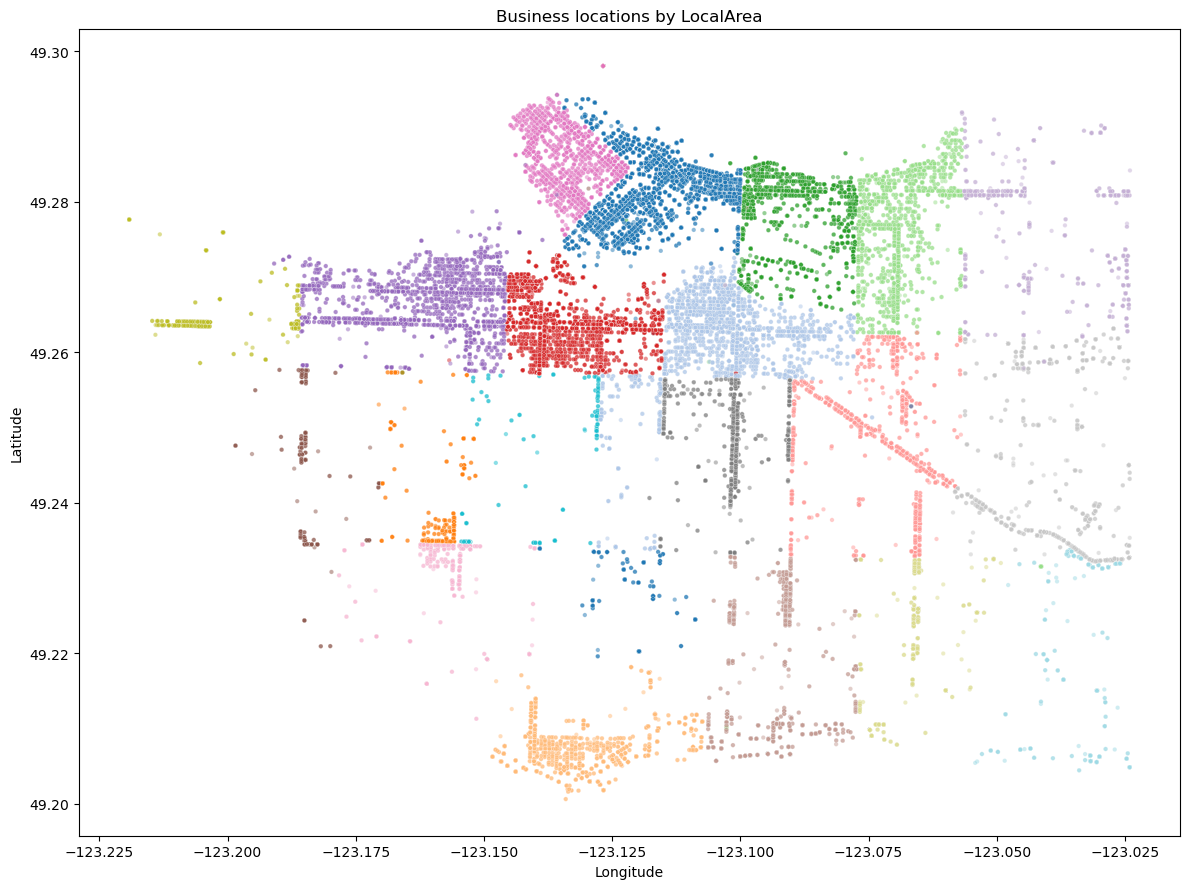

In [21]:
# Great. Now we can make a scatterplot with longitude and latitude, to see where business locations are distributed.

# Use seaborn for a nicer scatterplot by Business Type:
import seaborn as sns


if 'LocalArea' not in df1.columns:
    df1['LocalArea'] = 'Unknown'

unique_local_areas = df1['LocalArea'].nunique()

print(unique_local_areas)



plt.figure(figsize=(12, 9))
sns.scatterplot(
    data=df1,
    x='long',
    y='lat',
    hue='LocalArea',
    s=10,
    alpha=0.5,
        palette=sns.color_palette("tab20", n_colors=min(20, unique_local_areas)),
        legend=False
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Business locations by LocalArea')
plt.tight_layout()
plt.show()

91


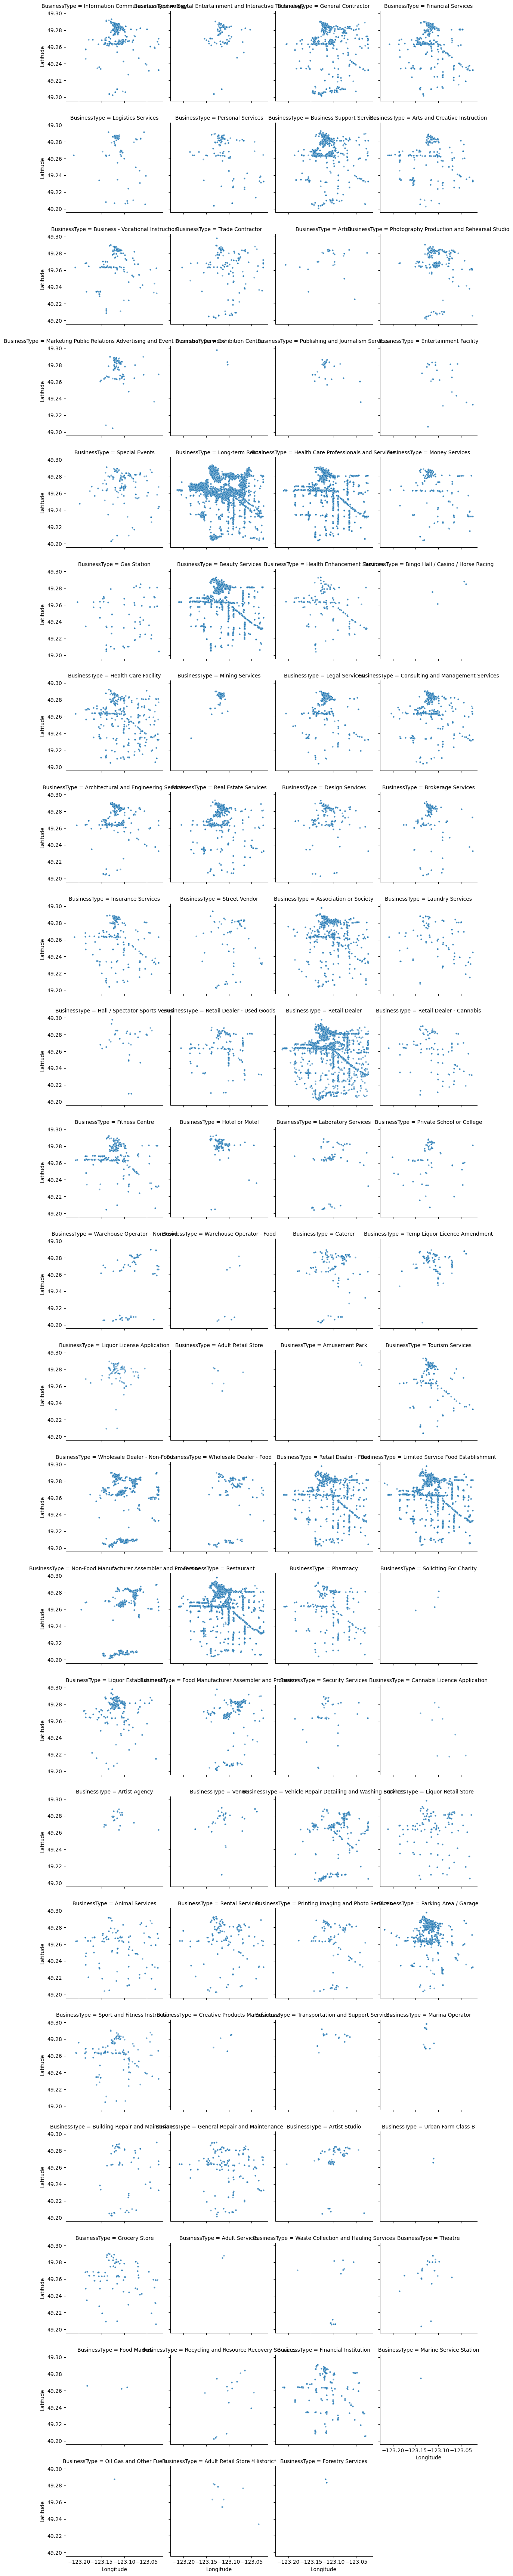

Saved faceted_business_locations.png


In [22]:
# It looks crowded, so let's use faceting to separate by BusinessType instead:

unique_biz_types = df1['BusinessType'].nunique()

print(unique_biz_types)

g = sns.relplot(
    data=df1,
    x='long',
    y='lat',
    col='BusinessType',
    col_wrap=4,            # panels per row
    height=3,              # height per facet (inches)
    aspect=1,              # width = height * aspect
    kind='scatter',
    s=10,
    alpha=0.6,
    facet_kws={'sharex': True, 'sharey': True}
)

g.set_axis_labels("Longitude", "Latitude")
plt.tight_layout()
plt.show()  # optional
print("Saved faceted_business_locations.png")

In [23]:
# Alright, wow! That's a lot of graphs, and calls for a different way of initial analysis methods. 
# Something tor realize now is that if we are using spacial data to analyze over/undersaturation,
# we shouldn't account for businesses types that are strictly online/are not location dependant.
# So, we will filter out registrations of the following business type:

drop_types = [
    'Information Communication Technology',
    'Digital Entertainment and Interactive Technology',
    'Publishing and Journalism Services',
    'Marketing Public Relations Advertising and Event Promotion Services',
    'Consulting and Management Services',
    'Business Support Services',
    'Design Services',
    'Architectural and Engineering Services',
    'Legal Services',
    'Insurance Services',
    'Financial Services',
    'Financial Institution',
    'Brokerage Services',
    'Real Estate Services',
    'Artist Agency',
    'Association or Society',
    'Mining Services',
    'Forestry Services',
    'Oil Gas and Other Fuels',
    'Logistics Services',
    'Transportation and Support Services',
    'Warehouse Operator - Food',
    'Warehouse Operator - Non-Food',
    'Wholesale Dealer - Food',
    'Wholesale Dealer - Non-Food',
    'Non-Food Manufacturer Assembler and Processor',
    'Food Manufacturer Assembler and Processor',
    'Recycling and Resource Recovery Services',
    'Waste Collection and Hauling Services',
    'Marine Service Station',
    'Soliciting For Charity',
    'Cannabis Licence Application',
    'Liquor License Application',
    'Temp Liquor Licence Amendment',
    'Adult Retail Store *Historic*'
]

df_filtered_0 = df1[~df1['BusinessType'].isin(drop_types)].copy()

print(df_filtered_0.sample(n = 10))


        FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
106743          25     4760709     25-236601                      0   
58240           24     4503571     24-122649                     10   
116155          25     4620288     25-112567                      0   
68968           25     4793693     25-268879                      0   
40469           24     4529212     24-148836                     10   
68014           25     4621200     25-113479                      0   
15560           24     4529203     24-148827                     11   
13574           24     4523974     24-143721                     10   
121614          25     4643256     25-135533                      0   
61569           24     4525983     24-146018                     10   

                          BusinessName     BusinessTradeName  \
106743  NYC Convenient Enterprises Inc  NYC Convenience Shop   
58240            Knowledge Barbers Inc                   NaN   
116155         Dr Howard S

In [30]:
# Now, we are only considering businesses that are physical-dependant.
# However, we have some industries that are zoning/infrastructure driven. Let's fix that.

infrastructure_types = [
    'Mining Services',
    'Forestry Services',
    'Oil Gas and Other Fuels',
    'Logistics Services',
    'Transportation and Support Services',
    'Warehouse Operator - Food',
    'Warehouse Operator - Non-Food',
    'Wholesale Dealer - Food',
    'Wholesale Dealer - Non-Food',
    'Non-Food Manufacturer Assembler and Processor',
    'Food Manufacturer Assembler and Processor',
    'Recycling and Resource Recovery Services',
    'Waste Collection and Hauling Services',
    'Marine Service Station',
    'Parking Area / Garage'
]


df_filtered_1 = df_filtered_0[~df_filtered_0['BusinessType'].isin(infrastructure_types)].copy()

print(df_filtered_1.sample(n = 5))

print(df_filtered_1['BusinessType'].unique())

print(df_filtered_1['BusinessType'].nunique())

        FOLDERYEAR  LicenceRSN LicenceNumber  LicenceRevisionNumber  \
126772          25     4619115     25-111394                      0   
47734           24     4509597     24-128726                     10   
97034           25     4630184     25-122463                      0   
79165           25     4627867     25-120146                      0   
2500            24     4495855     24-222817                     10   

                                     BusinessName  \
126772                 Oanh Xuan Diep (Oanh Diep)   
47734                      Butter Baked Goods Ltd   
97034   Patricia A Wakefield (Patricia Wakefield)   
79165                              1398250 BC Ltd   
2500                Lara M Dillman (Lara Dillman)   

                  BusinessTradeName                Status  \
126772                          NaN                Issued   
47734                           NaN  Gone Out of Business   
97034                           NaN                Issued   
79165   Pi

In [38]:
# Our analysis would also not be as viable if the business type has limited data.

# We want to make sure we only compute recommendations where there is enough local evidence.

# Well, we have 25 distinct locations. Let's say we want about 4 registrations per location,
# and 6 for more populated areas. We can then filter for business types with at least (15*6) 180
# registrations:

type_counts = df_filtered_1['BusinessType'].value_counts()

print(type_counts)



BusinessType
Health Care Professionals and Services           8602
Long-term Rental                                 7407
Retail Dealer                                    4884
Restaurant                                       3930
Beauty Services                                  3085
Limited Service Food Establishment               2960
Retail Dealer - Food                             1504
General Contractor                               1402
Health Care Facility                              737
Vehicle Repair Detailing and Washing Services     648
Photography Production and Rehearsal Studio       545
Liquor Establishment                              462
Fitness Centre                                    458
Caterer                                           439
Arts and Creative Instruction                     429
Pharmacy                                          403
Special Events                                    378
Tourism Services                                  348
Money Services 

In [56]:
# That gave us this list of the remaining business types, and the count of registrations.
#  A sufficient amount of them have observations over 180, so let's finish our filtering process:

big_types = type_counts[type_counts > 180]

# make into list of business types:

big_types = big_types.index.tolist()


df_filtered_2 = df_filtered_1[df_filtered_1['BusinessType'].isin(big_types)].copy()


print(df_filtered_2['BusinessType'].nunique())

print(df_filtered_2['BusinessType'].value_counts().min())


34
186


In [ ]:
# Great! Now, we have 34 business types, all with registrations over 180.
# We now have our filtered business types, containing only business types
# that are influenced by location and sufficiently large for our purposes.

# Another comment to note is that our dataset still has observations that 
# contain the status "Gone Out of Business", "Inactive", and "Canceled".